In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('brain.csv')
df = df[['X1', 'X2', 'y']]
df = df.rename(columns={'X1': 'seratonin', 'X2': 'dopamine', 'y': 'depression'})
df

# X1: Seratonin
# X2: Dopamine
# y: depression (present/absent)

,seratonin,dopamine,depression
0,2.947814,6.626878,1
1,2.530388,7.785050,1
2,3.566991,5.651046,1
3,3.156983,5.467077,1
4,2.582346,4.457777,-1
5,2.155826,6.222343,-1
6,3.273418,3.520687,-1


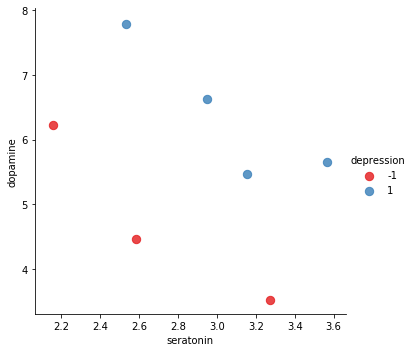

In [53]:
sns.lmplot('seratonin', 'dopamine', hue='depression', data=df, palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [54]:
df.head()

,seratonin,dopamine,depression
0,2.947814,6.626878,1
1,2.530388,7.785050,1
2,3.566991,5.651046,1
3,3.156983,5.467077,1
4,2.582346,4.457777,-1


In [55]:
colors = []

for d in df.depression:
    if d == 1:
        colors.append('r')
    else:
        colors.append('b')

In [81]:
labels = []
for d in df.depression:
    if d == 1:
        labels.append('H')
    else:
        labels.append('NH')

In [82]:
X_train = df[["seratonin", "dopamine"]].to_numpy()
y_train = df['depression'].values

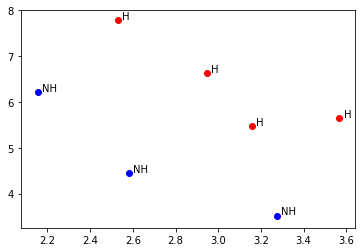

In [83]:
for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = colors[k])
    plt.text(i+0.02, j+0.02, labels[k])

In [84]:
from sklearn import svm

svm_classifier = svm.SVC(kernel='linear', C=10)
svm_classifier.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [85]:
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, colors='b', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

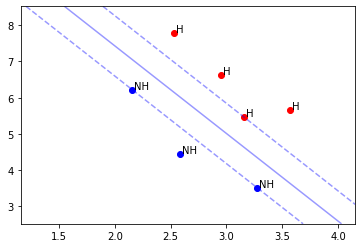

In [86]:
plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = colors[k])
    plt.text(i+0.02, j+0.02, labels[k])

In [87]:
# Number of support vectors
svm_classifier.n_support_

array([2, 1], dtype=int32)

In [88]:
svm_classifier.support_vectors_

array([[2.155826, 6.222343],
       [3.273418, 3.520687],
       [3.156983, 5.467077]])

In [89]:
# Finding the intercept

weight = svm_classifier.coef_
intercept = svm_classifier.intercept_

print(f"a and b: {weight}")
print(f'c: {intercept}')

a and b: [[2.90336685 1.20121959]]
c: [-14.73321143]


In [90]:
svm_classifier.predict([[3,6]])

array([1])

In [91]:
def am_i_healthy(csf, ser, dop):
    out = svm_classifier.predict([[ser, dop]])
    if out[0] == 1:
        print("You are healthy")
    else:
        print("You are depressed")

In [94]:
am_i_healthy(svm_classifier, 3, 6)

You are healthy


In [95]:
am_i_healthy(svm_classifier, 2.5, 5)

You are depressed


In [97]:
df2 = pd.read_csv('random.csv')
df2.head()

,x1,x2,y
0,7.0,20,-1
1,8.0,12,-1
2,9.0,19,-1
3,10.0,17,-1
4,11.0,15,-1


In [99]:
colors = []

for d in df2.y:
    if d == 1:
        colors.append('r')
    else:
        colors.append('b')

In [100]:
labels = []
for d in df2.y:
    if d == 1:
        labels.append('H')
    else:
        labels.append('NH')

In [102]:
X_train = df2[["x1", "x2"]].to_numpy()
y_train = df2['y'].values

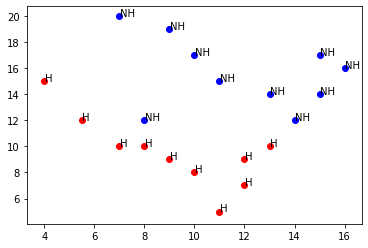

In [103]:
for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = colors[k])
    plt.text(i+0.02, j+0.02, labels[k])

In [128]:
from sklearn import svm

svm_classifier_1 = svm.SVC(kernel='poly', C=10, degree=2)
svm_classifier_1.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

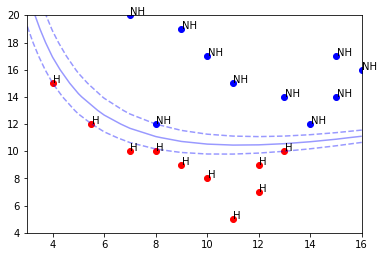

In [129]:
plot_decision_boundary(svm_classifier_1, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = colors[k])
    plt.text(i+0.02, j+0.02, labels[k])

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [158]:
cf_no_weight = svm.SVC(kernel='linear')
cf_yes_weight = svm.SVC(kernel='linear', class_weight={1: 10})

In [159]:
cf_no_weight.fit(X,y)
cf_yes_weight.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight={1: 10}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [153]:
def get_error(cf, X, y):
    ds_size = len(y)
    num_wrong = 0
    for features, y in zip(X, y):
        if cf.predict([features])[0] != y:
            num_wrong += 1
    return num_wrong/ds_size * 100

In [154]:
print(f'% error for no weight: {round(get_error(cf_no_weight, X, y), 2)}%')

% error for no weight: 5.91%


In [155]:
print(f'% error with weight: {round(get_error(cf_yes_weight, X, y), 2)}%')

% error with weight: 9.0%


In [161]:
colors = []

for val in y:
    if val == 1:
        colors.append('r')
    else:
        colors.append('b')

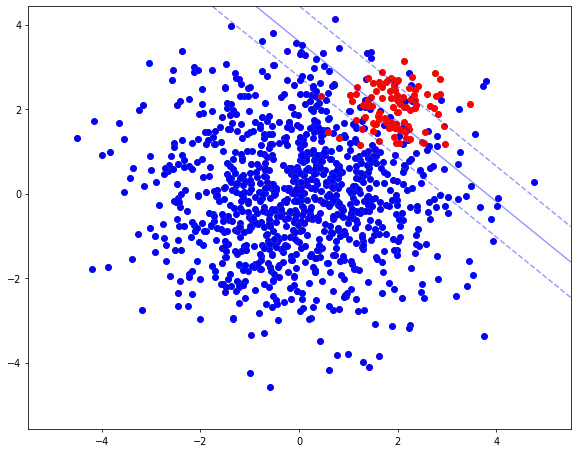

In [171]:
plt.figure(figsize=(10, 8), dpi=70)

plot_decision_boundary(cf_no_weight, X, y)

for k, (i,j) in enumerate(X):
    plt.scatter(i, j)
    plt.scatter(i, j, c = colors[k])

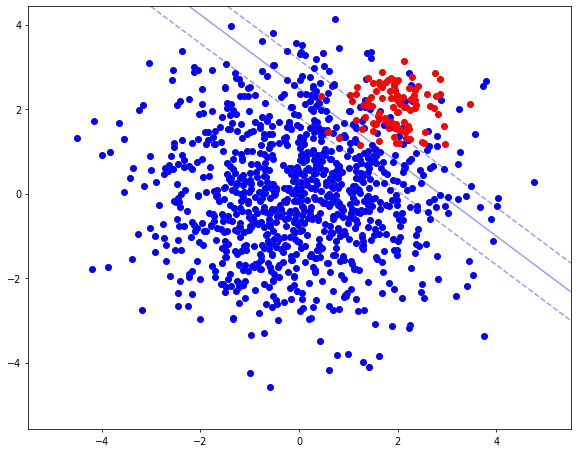

In [172]:
plt.figure(figsize=(10, 8), dpi=70)

plot_decision_boundary(cf_yes_weight, X, y)

for k, (i,j) in enumerate(X):
    plt.scatter(i, j)
    plt.scatter(i, j, c = colors[k])